<a href="https://colab.research.google.com/github/francianerod/meteoblue-do-BRASIL/blob/main/CnC_Culturas_do_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Código feito por:** Franciane Rodrigues

**Empresa:** meteoblue do Brasil

**Área/Setor:** Pesquisa e Desenvolvimento

**Motivo:** Investigar principais produtos agrícolas no Brasil

**Método:** Análise Exploratória dos dados

**Ano de coleta dos dados:** 2020

**Atualizado em:**  22/09/2021

**Fonte:** IBGE - Produção Agrícola Municipal

**Inspirado em:** https://github.com/marcosvafg/mapa_eleicoes_2018

## **1) PERGUNTAS A SEREM RESPONDIDAS**

Perguntas a serem respondidas:

1.   Quais culturas são mais produzidas no Brasil?
1.   Onde essas principais culturas se encontram?


## **2) USANDO GOOGLE COLAB, INSTALAÇÃO E ABERTURA DE PACOTES**

In [ ]:
# Comando de abertura para Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Para construção de mapas e gráficos interativos
# Instalando pacotes necessários para execução da visualização
# Ao baixar os pacotes uma única vez, desligar o comando da célula.

!pip install geopandas
!pip install plotly


     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 16.7 MB 352 kB/s 
     |████████████████████████████████| 6.3 MB 30.0 MB/s 


In [ ]:
# Abertura de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

## **3) ORGANIZAÇÃO DA BASE DE DADOS**

In [ ]:
#Escolha da planilha: Nível Brasil - Cultura Temporária
dataset_temporario = pd.read_excel('/content/drive/MyDrive/Agricultura/lavouras_temporarias_2020.xlsx', sheet_name='Brasil_2020')

# Renomeando colunas no Dataset
dataset_temporario = dataset_temporario.rename({'Produto das lavouras temporárias': 'Produto'}, axis = 1)
dataset_temporario = dataset_temporario.rename({'Área plantada (Hectares)': 'Area_plantada (ha)'}, axis = 1)
dataset_temporario = dataset_temporario.rename({'Área colhida (Hectares)': 'Area_colhida (ha)'}, axis = 1)
dataset_temporario = dataset_temporario.rename({'Quantidade produzida (Toneladas)': 'Quanti_produzida (t)'}, axis = 1)
dataset_temporario = dataset_temporario.rename({'Rendimento médio da produção (Quilogramas por Hectare)': 'Rendimento (Kg/ha)'}, axis = 1)
dataset_temporario = dataset_temporario.rename({'Valor da produção (Mil Reais)': 'Valor da produção (mil reais)'}, axis = 1)

# Mostrando as váriaveis disponíveis
dataset_temporario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Produto                        30 non-null     object
 1   Area_plantada (ha)             30 non-null     int64 
 2   Area_colhida (ha)              30 non-null     int64 
 3   Quanti_produzida (t)           30 non-null     int64 
 4   Rendimento (Kg/ha)             30 non-null     int64 
 5   Valor da produção (mil reais)  30 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


In [ ]:
#Escolha da planilha: Nível Brasil - Cultura Permanente
dataset_permanente = pd.read_excel('/content/drive/MyDrive/Agricultura/lavouras_permanentes_2020.xlsx', sheet_name='Brasil_2020')

# Renomeando colunas no Dataset
dataset_permanente = dataset_permanente.rename({'Produto das lavouras permanentes': 'Produto'}, axis = 1)
dataset_permanente = dataset_permanente.rename({'Área destinada à colheita (Hectares)': 'Area_para_colheita (ha)'}, axis = 1)
dataset_permanente = dataset_permanente.rename({'Área colhida (Hectares)': 'Area_colhida (ha)'}, axis = 1)
dataset_permanente = dataset_permanente.rename({'Quantidade produzida (Toneladas)': 'Quanti_produzida (t)'}, axis = 1)
dataset_permanente = dataset_permanente.rename({'Rendimento médio da produção (Quilogramas por Hectare)': 'Rendimento (Kg/ha)'}, axis = 1)
dataset_permanente = dataset_permanente.rename({'Valor da produção (Mil Reais)': 'Valor da produção (mil reais)'}, axis = 1)

# Mostrando as váriaveis disponiveis
dataset_permanente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Produto                        35 non-null     object
 1   Area_para_colheita (ha)        35 non-null     int64 
 2   Area_colhida (ha)              35 non-null     int64 
 3   Quanti_produzida (t)           35 non-null     int64 
 4   Rendimento (Kg/ha)             35 non-null     int64 
 5   Valor da produção (mil reais)  35 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


## **4) REORGANIZAÇÃO EM ORDEM E GRÁFICOS**

In [ ]:
# Colocando em ordem descrescente os dados da culturas temporárias a partir de uma váriável.
dataset_temporario = dataset_temporario.sort_values('Area_colhida (ha)', ascending=False)

# Mostrando a base de dados após reorganização
#dataset_temporario

In [ ]:
# Gráfico das principais culturas no Brasil - Culturas temporárias
fig = px.bar(dataset_temporario, 
             x='Produto', 
             y='Area_colhida (ha)', 
             title="Principais culturas temporárias no Brasil", text_auto='.2s')
fig.show()

In [ ]:
# Colocando em ordem descrescente os dados da culturas permanentes a partir de uma váriável.
dataset_permanente = dataset_permanente.sort_values('Area_colhida (ha)', ascending=False)

# Mostrando a base de dados após reorganização
#dataset_permanente

In [ ]:
# Gráfico das principais culturas no Brasil - Culturas permanentes
fig = px.bar(dataset_permanente, 
             x='Produto', 
             y='Area_colhida (ha)', 
             title="Principais culturas permanentes no Brasil", text_auto='.2s')
fig.show()

## **5) UNIÃO DE DADOS DE MAPA E CULTURA POR MUNICIPIO - Soja**

In [ ]:
# Base de dados dos municipios do Brasil 
dataset_mapa = gpd.read_file('/content/drive/MyDrive/Mapas/BR_Municipios_2020/BR_Municipios_2020.shp')
dataset_mapa = dataset_mapa.rename({'CD_MUN': 'CODIGO'}, axis = 1)
dataset_mapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CODIGO    5570 non-null   object  
 1   NM_MUN    5570 non-null   object  
 2   SIGLA_UF  5570 non-null   object  
 3   AREA_KM2  5570 non-null   float64 
 4   geometry  5570 non-null   geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 217.7+ KB


In [ ]:
#Base de dados de soja
dataset_soja = pd.read_csv('/content/drive/MyDrive/Agricultura/municipio_area_colhida_soja_ha.csv', sep=';')
dataset_soja = dataset_soja.rename({'Cód.': 'CODIGO'}, axis = 1)
dataset_soja = dataset_soja.rename({'Soja (em grão)': 'SOJA'}, axis = 1)
dataset_soja['CODIGO'] = dataset_soja['CODIGO'].astype(str)
dataset_soja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5563 entries, 0 to 5562
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CODIGO     5563 non-null   object
 1   Município  5563 non-null   object
 2   SOJA       5563 non-null   object
dtypes: object(3)
memory usage: 130.5+ KB


In [ ]:
# União dos dataframe Mapa e SOJA
uniao_oficial_SOJA = dataset_mapa.merge(dataset_soja, on = "CODIGO", how = "left")
uniao_oficial_SOJA.isnull().sum()

CODIGO       0
NM_MUN       0
SIGLA_UF     0
AREA_KM2     0
geometry     0
Município    7
SOJA         7
dtype: int64

In [ ]:
# Dados vazios que não possuem plantação de soja em seus territórios
uniao_oficial_SOJA[uniao_oficial_SOJA['SOJA'].isnull()]

,CODIGO,NM_MUN,SIGLA_UF,AREA_KM2,geometry,Município,SOJA
258,1506401,Santa Cruz do Arari,PA,1076.652,"POLYGON ((-49.23449 -0.48060, -49.22683 -0.482...",NaN,NaN
3180,3300258,Arraial do Cabo,RJ,152.106,"MULTIPOLYGON (((-42.03738 -22.98458, -42.03740...",NaN,NaN
3221,3303203,Nilópolis,RJ,19.393,"POLYGON ((-43.40291 -22.80030, -43.40187 -22.8...",NaN,NaN
3249,3305109,São João de Meriti,RJ,35.216,"POLYGON ((-43.32960 -22.76372, -43.32967 -22.7...",NaN,NaN
3419,3513801,Diadema,SP,30.732,"POLYGON ((-46.61527 -23.66131, -46.61526 -23.6...",NaN,NaN
3500,3520426,Ilha Comprida,SP,196.567,"POLYGON ((-47.41705 -24.67246, -47.41529 -24.6...",NaN,NaN
3812,3548807,São Caetano do Sul,SP,15.331,"POLYGON ((-46.55698 -23.61209, -46.55694 -23.6...",NaN,NaN


In [ ]:
# Tratar dados faltantes
uniao_oficial_SOJA.dropna(inplace=True)
uniao_oficial_SOJA.isnull().sum()

CODIGO       0
NM_MUN       0
SIGLA_UF     0
AREA_KM2     0
geometry     0
Município    0
SOJA         0
dtype: int64

In [ ]:
# Base de dados oficial após o tratamento - finalizado
uniao_oficial_SOJA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5563 entries, 0 to 5569
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CODIGO     5563 non-null   object  
 1   NM_MUN     5563 non-null   object  
 2   SIGLA_UF   5563 non-null   object  
 3   AREA_KM2   5563 non-null   float64 
 4   geometry   5563 non-null   geometry
 5   Município  5563 non-null   object  
 6   SOJA       5563 non-null   object  
dtypes: float64(1), geometry(1), object(5)
memory usage: 347.7+ KB


## **6) EXEMPLO DE MAPA POR MUNICIPIO - SOJA**

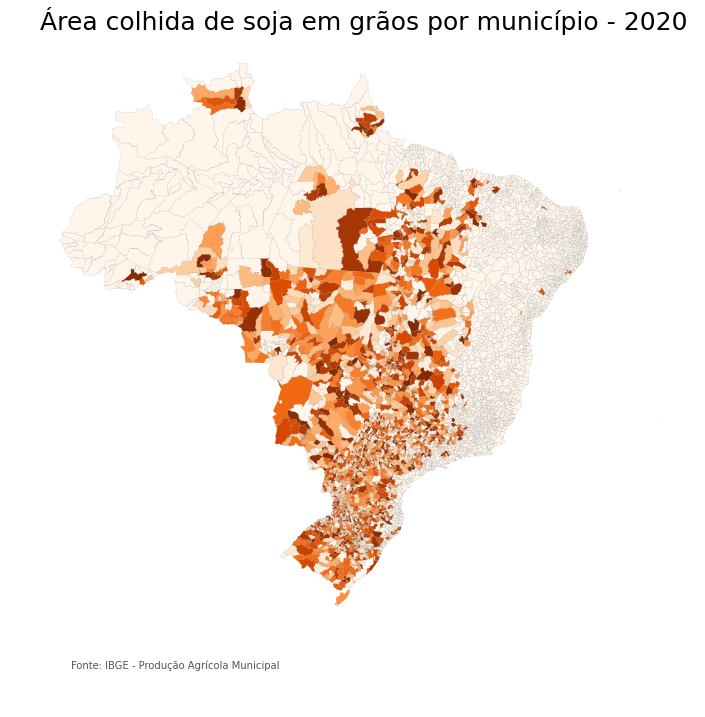

In [ ]:
# Expandir o tamanho do mapa
fig, ax = plt.subplots(1, figsize = (12,12))

# Desenhar o mapa
ax = uniao_oficial_SOJA.plot(column='SOJA', cmap='Oranges', linewidth=.1, ax=ax, edgecolor='gray')

# Tirar os eixos do mapa
ax.set_axis_off()

#Colocando título
ax.set_title('Área colhida de soja em grãos por município - 2020', fontdict={'fontsize':'25', 'fontweight': '3'})

# Nota de rodapé
ax.annotate('Fonte: IBGE - Produção Agrícola Municipal', xy=(0.1, 0.08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

# Mostrar o mapa
plt.show()

# **7) ORGANIZAÇÃO DE DADOS E MAPA POR MESORREGIÃO - SOJA**

In [ ]:
# Base de dados das mesorregiões do Brasil 
dataset_mapa_meso = gpd.read_file('/content/drive/MyDrive/Mapas/BR_Mesorregioes_2020/BR_Mesorregioes_2020.shp')
dataset_mapa_meso.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MESO   137 non-null    object  
 1   NM_MESO   137 non-null    object  
 2   SIGLA_UF  137 non-null    object  
 3   geometry  137 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 4.4+ KB


In [ ]:
#Base de dados das mesorregiões de soja
dataset_soja_meso = pd.read_excel('/content/drive/MyDrive/Agricultura/mesorregiao_area_colhida_soja_ha.xlsx')
dataset_soja_meso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CODIGO       137 non-null    float64
 1   MESORREGIAO  137 non-null    object 
 2   SOJA         138 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ KB


In [ ]:
# União dos dataframe Mapa de Mesorregião e SOJA
uniao_meso_SOJA = pd.merge(dataset_mapa_meso, dataset_soja_meso, left_index=True, right_index=True)
uniao_meso_SOJA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CD_MESO      137 non-null    object  
 1   NM_MESO      137 non-null    object  
 2   SIGLA_UF     137 non-null    object  
 3   geometry     137 non-null    geometry
 4   CODIGO       137 non-null    float64 
 5   MESORREGIAO  137 non-null    object  
 6   SOJA         137 non-null    int64   
dtypes: float64(1), geometry(1), int64(1), object(4)
memory usage: 8.6+ KB


In [ ]:
# Tratar dados faltantes
uniao_meso_SOJA.dropna(inplace=True)
uniao_meso_SOJA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CD_MESO      137 non-null    object  
 1   NM_MESO      137 non-null    object  
 2   SIGLA_UF     137 non-null    object  
 3   geometry     137 non-null    geometry
 4   CODIGO       137 non-null    float64 
 5   MESORREGIAO  137 non-null    object  
 6   SOJA         137 non-null    int64   
dtypes: float64(1), geometry(1), int64(1), object(4)
memory usage: 8.6+ KB


In [ ]:
# Colocando em ordem
uniao_meso_SOJA = uniao_meso_SOJA.sort_values('SOJA', ascending=False)

# Mostrando a base de dados após reorganização das 10 primeiras posições
uniao_meso_SOJA.head(10)

,CD_MESO,NM_MESO,SIGLA_UF,geometry,CODIGO,MESORREGIAO,SOJA
126,5101,Norte Mato-grossense,MT,"POLYGON ((-60.46005 -10.98986, -60.49122 -10.9...",5101.0,Norte Mato-grossense (MT),6331922
115,4301,Noroeste Rio-grandense,RS,"POLYGON ((-54.99932 -27.79051, -54.99745 -27.7...",4301.0,Noroeste Rio-grandense (RS),3083439
135,5205,Sul Goiano,GO,"POLYGON ((-52.83237 -16.77216, -52.83219 -16.7...",5205.0,Sul Goiano (GO),2514717
125,5004,Sudoeste de Mato Grosso do Sul,MS,"POLYGON ((-56.78713 -21.44848, -56.78797 -21.4...",5004.0,Sudoeste de Mato Grosso do Sul (MS),2001927
127,5102,Nordeste Mato-grossense,MT,"POLYGON ((-53.24484 -11.21109, -53.24389 -11.2...",5102.0,Nordeste Mato-grossense (MT),1911576
55,2901,Extremo Oeste Baiano,BA,"POLYGON ((-46.38894 -12.04883, -46.38899 -12.0...",2901.0,Extremo Oeste Baiano (BA),1617150
130,5105,Sudeste Mato-grossense,MT,"POLYGON ((-55.41962 -15.93114, -55.41963 -15.9...",5105.0,Sudeste Mato-grossense (MT),1358701
104,4106,Oeste Paranaense,PR,"POLYGON ((-54.32688 -24.65950, -54.32613 -24.6...",4106.0,Oeste Paranaense (PR),1018294
101,4103,Norte Central Paranaense,PR,"POLYGON ((-52.03689 -23.02207, -52.03268 -23.0...",4103.0,Norte Central Paranaense (PR),926214
66,3105,Triângulo Mineiro/Alto Paranaíba,MG,"POLYGON ((-47.67975 -18.35609, -47.67936 -18.3...",3105.0,Triângulo Mineiro/Alto Paranaíba (MG),903314


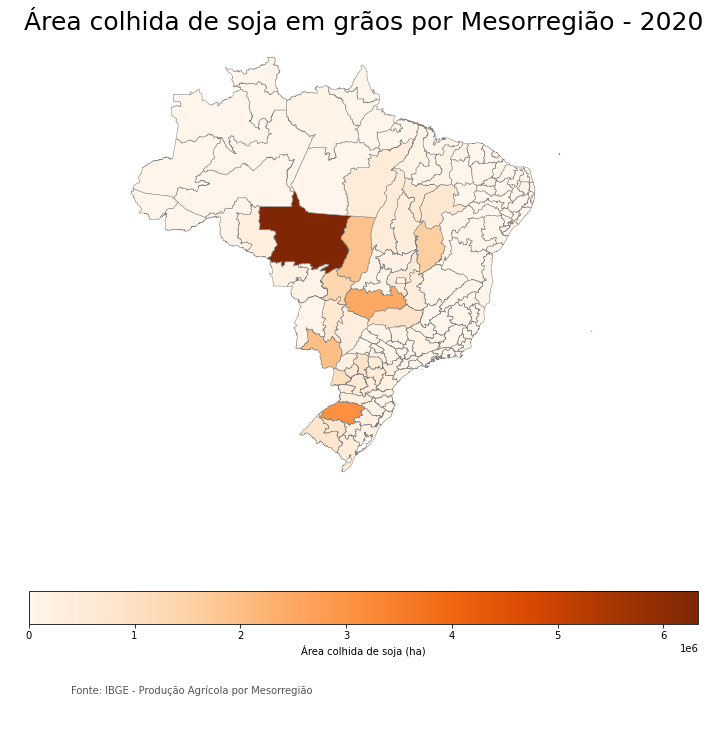

In [ ]:
# Expandir o tamanho do mapa
fig, ax = plt.subplots(1, figsize = (12,12))

# Desenhar o mapa
ax = uniao_meso_SOJA.plot(column='SOJA', cmap='Oranges', linewidth=.5, ax=ax, edgecolor='gray', 
                          legend=True, 
                          legend_kwds={'label': "Área colhida de soja (ha)", 'orientation': "horizontal"})

# Tirar os eixos do mapa
ax.set_axis_off()

#Colocando título
ax.set_title('Área colhida de soja em grãos por Mesorregião - 2020', fontdict={'fontsize':'25', 'fontweight': '3'})

# Nota de rodapé
ax.annotate('Fonte: IBGE - Produção Agrícola por Mesorregião', xy=(0.1, 0.08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

# Mostrar o mapa
plt.show()

# **8) ORGANIZAÇÃO DE DADOS E MAPA POR MESORREGIÃO - MILHO**

In [ ]:
#Base de dados das mesorregiões de milho
dataset_milho_meso = pd.read_excel('/content/drive/MyDrive/Agricultura/mesorregião_area_colhida_milho_1_2.xlsx')
dataset_milho_meso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mesorregião Geográfica    137 non-null    object
 1   Milho (em grão)_1ª safra  137 non-null    int64 
 2   Milho (em grão)_2ª safra  137 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [ ]:
# União dos dataframe Mapa de Mesorregião e SOJA
uniao_meso_milho = pd.merge(dataset_mapa_meso, dataset_milho_meso, left_index=True, right_index=True)
uniao_meso_milho.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CD_MESO                   137 non-null    object  
 1   NM_MESO                   137 non-null    object  
 2   SIGLA_UF                  137 non-null    object  
 3   geometry                  137 non-null    geometry
 4   Mesorregião Geográfica    137 non-null    object  
 5   Milho (em grão)_1ª safra  137 non-null    int64   
 6   Milho (em grão)_2ª safra  137 non-null    int64   
dtypes: geometry(1), int64(2), object(4)
memory usage: 7.6+ KB


In [ ]:
# Colocando em ordem
uniao_meso_milho = uniao_meso_milho.sort_values('Milho (em grão)_1ª safra', ascending=False)

# Mostrando a base de dados após reorganização das 10 primeiras posições
uniao_meso_milho.head(10)

,CD_MESO,NM_MESO,SIGLA_UF,geometry,Mesorregião Geográfica,Milho (em grão)_1ª safra,Milho (em grão)_2ª safra
115,4301,Noroeste Rio-grandense,RS,"POLYGON ((-54.99932 -27.79051, -54.99745 -27.7...",Noroeste Rio-grandense (RS),399678,0
27,2203,Sudoeste Piauiense,PI,"POLYGON ((-45.70636 -8.38762, -45.70499 -8.385...",Sudoeste Piauiense (PI),263541,31808
55,2901,Extremo Oeste Baiano,BA,"POLYGON ((-46.38894 -12.04883, -46.38899 -12.0...",Extremo Oeste Baiano (BA),200354,4000
66,3105,Triângulo Mineiro/Alto Paranaíba,MG,"POLYGON ((-47.67975 -18.35609, -47.67936 -18.3...",Triângulo Mineiro/Alto Paranaíba (MG),198581,271692
32,2304,Sertões Cearenses,CE,"POLYGON ((-40.92932 -5.49309, -40.92912 -5.492...",Sertões Cearenses (CE),191220,0
109,4201,Oeste Catarinense,SC,"POLYGON ((-53.67535 -26.89281, -53.67677 -26.8...",Oeste Catarinense (SC),191095,0
71,3110,Sul/Sudoeste de Minas,MG,"POLYGON ((-47.14786 -21.03546, -47.14806 -21.0...",Sul/Sudoeste de Minas (MG),124141,50940
15,1506,Sudeste Paraense,PA,"POLYGON ((-50.10850 -4.07798, -50.10519 -4.076...",Sudeste Paraense (PA),116886,89548
29,2301,Noroeste Cearense,CE,"POLYGON ((-41.30303 -3.49218, -41.31034 -3.488...",Noroeste Cearense (CE),116164,0
24,2105,Sul Maranhense,MA,"POLYGON ((-47.42525 -6.49736, -47.41941 -6.491...",Sul Maranhense (MA),114190,182321


In [ ]:
# Colocando em ordem
uniao_meso_milho = uniao_meso_milho.sort_values('Milho (em grão)_2ª safra', ascending=False)

# Mostrando a base de dados após reorganização das 10 primeiras posições
uniao_meso_milho.head(10)

,CD_MESO,NM_MESO,SIGLA_UF,geometry,Mesorregião Geográfica,Milho (em grão)_1ª safra,Milho (em grão)_2ª safra
126,5101,Norte Mato-grossense,MT,"POLYGON ((-60.46005 -10.98986, -60.49122 -10.9...",Norte Mato-grossense (MT),19785,3794405
125,5004,Sudoeste de Mato Grosso do Sul,MS,"POLYGON ((-56.78713 -21.44848, -56.78797 -21.4...",Sudoeste de Mato Grosso do Sul (MS),4037,1377689
135,5205,Sul Goiano,GO,"POLYGON ((-52.83237 -16.77216, -52.83219 -16.7...",Sul Goiano (GO),84569,1306350
127,5102,Nordeste Mato-grossense,MT,"POLYGON ((-53.24484 -11.21109, -53.24389 -11.2...",Nordeste Mato-grossense (MT),1520,769977
104,4106,Oeste Paranaense,PR,"POLYGON ((-54.32688 -24.65950, -54.32613 -24.6...",Oeste Paranaense (PR),30495,719446
101,4103,Norte Central Paranaense,PR,"POLYGON ((-52.03689 -23.02207, -52.03268 -23.0...",Norte Central Paranaense (PR),15079,573786
130,5105,Sudeste Mato-grossense,MT,"POLYGON ((-55.41962 -15.93114, -55.41963 -15.9...",Sudeste Mato-grossense (MT),11250,550086
123,5002,Centro Norte de Mato Grosso do Sul,MS,"POLYGON ((-55.10167 -19.33500, -55.10181 -19.3...",Centro Norte de Mato Grosso do Sul (MS),3210,410433
100,4102,Centro Ocidental Paranaense,PR,"POLYGON ((-53.13159 -24.10287, -53.12476 -24.0...",Centro Ocidental Paranaense (PR),16944,379750
66,3105,Triângulo Mineiro/Alto Paranaíba,MG,"POLYGON ((-47.67975 -18.35609, -47.67936 -18.3...",Triângulo Mineiro/Alto Paranaíba (MG),198581,271692


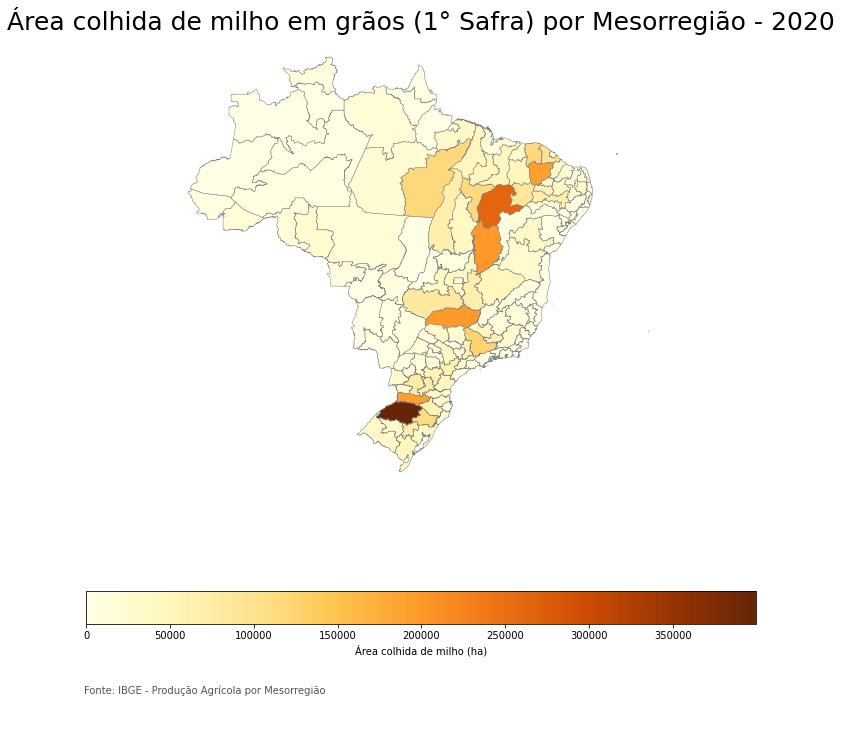

In [ ]:
# Expandir o tamanho do mapa
fig, ax = plt.subplots(1, figsize = (12,12))

# Desenhar o mapa
ax = uniao_meso_milho.plot(column='Milho (em grão)_1ª safra', cmap='YlOrBr', linewidth=.5, ax=ax, edgecolor='gray', 
                          legend=True, 
                          legend_kwds={'label': "Área colhida de milho (ha)", 'orientation': "horizontal"})

# Tirar os eixos do mapa
ax.set_axis_off()

#Colocando título
ax.set_title('Área colhida de milho em grãos (2° Safra - Inverno) por Mesorregião - 2020', fontdict={'fontsize':'25', 'fontweight': '3'})

# Nota de rodapé
ax.annotate('Fonte: IBGE - Produção Agrícola por Mesorregião', xy=(0.1, 0.08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

# Mostrar o mapa
plt.show()

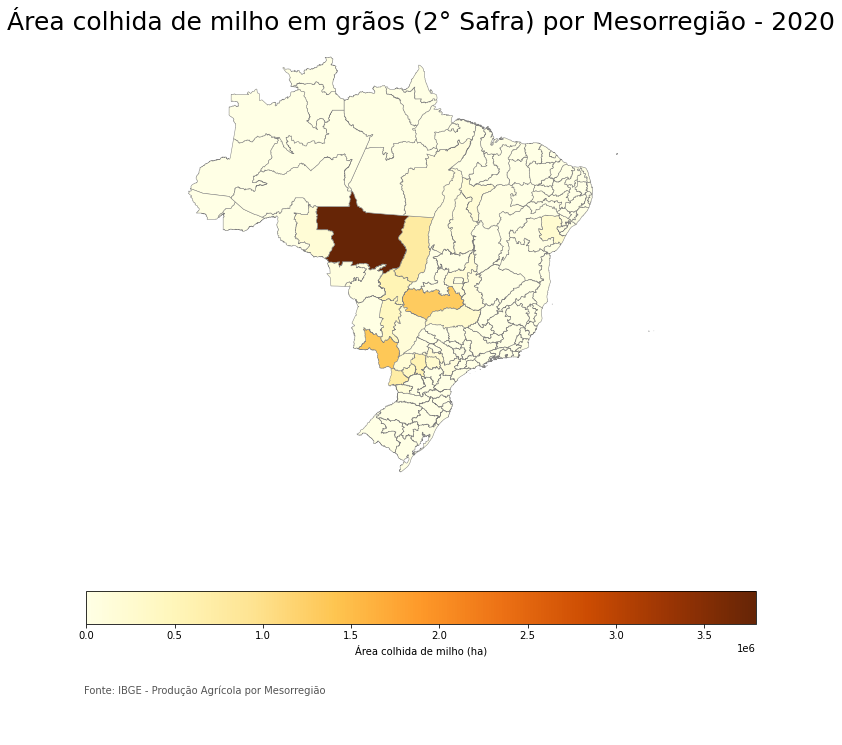

In [ ]:
# Expandir o tamanho do mapa
fig, ax = plt.subplots(1, figsize = (12,12))

# Desenhar o mapa
ax = uniao_meso_milho.plot(column='Milho (em grão)_2ª safra', cmap='YlOrBr', linewidth=.5, ax=ax, edgecolor='gray', 
                          legend=True, 
                          legend_kwds={'label': "Área colhida de milho (ha)", 'orientation': "horizontal"})

# Tirar os eixos do mapa
ax.set_axis_off()

#Colocando título
ax.set_title('Área colhida de milho em grãos (1° Safra - Verão) por Mesorregião - 2020', fontdict={'fontsize':'25', 'fontweight': '3'})

# Nota de rodapé
ax.annotate('Fonte: IBGE - Produção Agrícola por Mesorregião', xy=(0.1, 0.08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

# Mostrar o mapa
plt.show()

# **9) ORGANIZAÇÃO DE DADOS E MAPA POR MESORREGIÃO - CANA-DE-AÇÚCAR E TRIGO**

In [ ]:
#Base de dados das mesorregiões de outras culturas
dataset_outras_meso = pd.read_excel('/content/drive/MyDrive/Agricultura/outras_culturas_meso_temp.xlsx')
dataset_outras_meso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mesorregião Geográfica  137 non-null    object
 1   Cana-de-açúcar          137 non-null    int64 
 2   Feijão (em grão)        137 non-null    int64 
 3   Trigo (em grão)         137 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.4+ KB


In [ ]:
# União dos dataframe Mapa de Mesorregião outras
uniao_meso_outras = pd.merge(dataset_mapa_meso, dataset_outras_meso, left_index=True, right_index=True)
uniao_meso_outras.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CD_MESO                 137 non-null    object  
 1   NM_MESO                 137 non-null    object  
 2   SIGLA_UF                137 non-null    object  
 3   geometry                137 non-null    geometry
 4   Mesorregião Geográfica  137 non-null    object  
 5   Cana-de-açúcar          137 non-null    int64   
 6   Feijão (em grão)        137 non-null    int64   
 7   Trigo (em grão)         137 non-null    int64   
dtypes: geometry(1), int64(3), object(4)
memory usage: 8.7+ KB


In [ ]:
# Colocando em ordem
uniao_meso_outras = uniao_meso_outras.sort_values('Trigo (em grão)', ascending=False)

# Mostrando a base de dados após reorganização das 10 primeiras posições
uniao_meso_outras.head(10)

,CD_MESO,NM_MESO,SIGLA_UF,geometry,Mesorregião Geográfica,Cana-de-açúcar,Feijão (em grão),Trigo (em grão)
115,4301,Noroeste Rio-grandense,RS,"POLYGON ((-54.99932 -27.79051, -54.99745 -27.7...",Noroeste Rio-grandense (RS),6986,31229,742854
101,4103,Norte Central Paranaense,PR,"POLYGON ((-52.03689 -23.02207, -52.03268 -23.0...",Norte Central Paranaense (PR),153146,12521,217853
104,4106,Oeste Paranaense,PR,"POLYGON ((-54.32688 -24.65950, -54.32613 -24.6...",Oeste Paranaense (PR),2779,13822,214278
102,4104,Norte Pioneiro Paranaense,PR,"POLYGON ((-50.96340 -23.30342, -50.96258 -23.3...",Norte Pioneiro Paranaense (PR),72942,7185,152710
105,4107,Sudoeste Paranaense,PR,"POLYGON ((-53.84979 -25.69078, -53.84938 -25.6...",Sudoeste Paranaense (PR),781,67635,140900
103,4105,Centro Oriental Paranaense,PR,"POLYGON ((-51.09801 -24.32583, -51.09618 -24.3...",Centro Oriental Paranaense (PR),224,63020,124050
100,4102,Centro Ocidental Paranaense,PR,"POLYGON ((-53.13159 -24.10287, -53.12476 -24.0...",Centro Ocidental Paranaense (PR),18300,6548,110835
106,4108,Centro-Sul Paranaense,PR,"POLYGON ((-52.84000 -25.27354, -52.83883 -25.2...",Centro-Sul Paranaense (PR),106,61135,104490
94,3511,Itapetininga,SP,"POLYGON ((-48.22490 -23.19625, -48.22420 -23.1...",Itapetininga (SP),51768,35717,103385
120,4306,Sudoeste Rio-grandense,RS,"POLYGON ((-56.32327 -28.92473, -56.32164 -28.9...",Sudoeste Rio-grandense (RS),82,110,86098


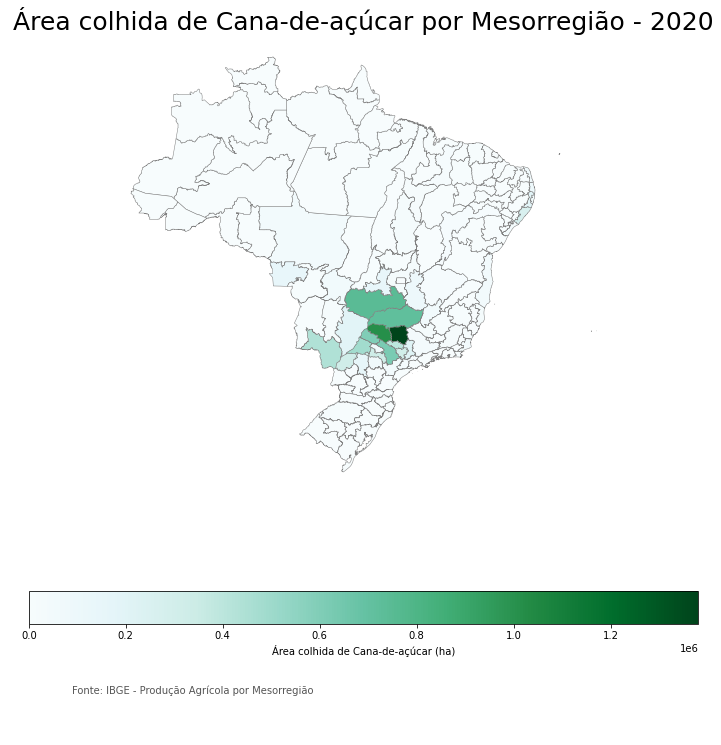

In [ ]:
# Expandir o tamanho do mapa
fig, ax = plt.subplots(1, figsize = (12,12))

# Desenhar o mapa
ax = uniao_meso_outras.plot(column='Cana-de-açúcar', cmap='BuGn', linewidth=.5, ax=ax, edgecolor='gray', 
                          legend=True, 
                          legend_kwds={'label': "Área colhida de Cana-de-açúcar (ha)", 'orientation': "horizontal"})

# Tirar os eixos do mapa
ax.set_axis_off()

#Colocando título
ax.set_title('Área colhida de Cana-de-açúcar por Mesorregião - 2020', fontdict={'fontsize':'25', 'fontweight': '3'})

# Nota de rodapé
ax.annotate('Fonte: IBGE - Produção Agrícola por Mesorregião', xy=(0.1, 0.08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

# Mostrar o mapa
plt.show()

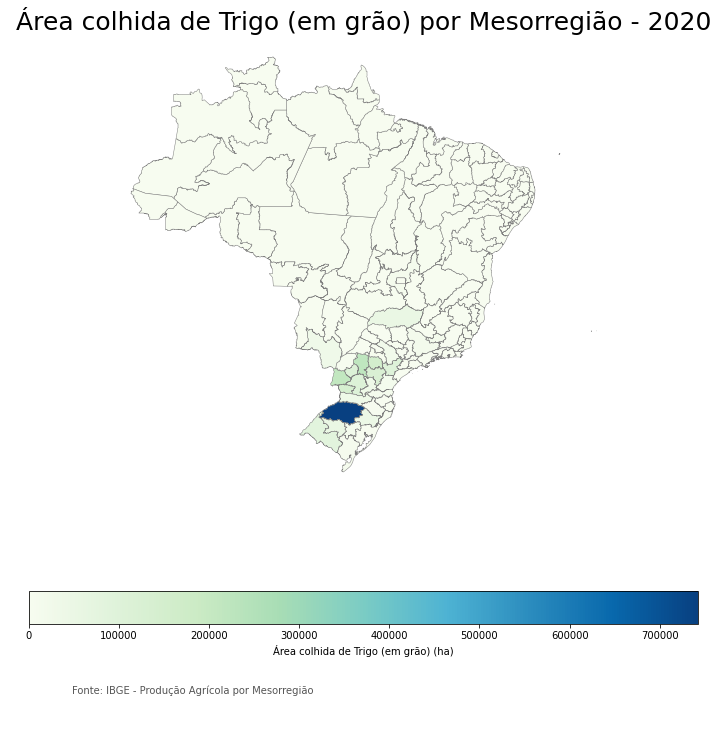

In [ ]:
# Expandir o tamanho do mapa
fig, ax = plt.subplots(1, figsize = (12,12))

# Desenhar o mapa
ax = uniao_meso_outras.plot(column='Trigo (em grão)', cmap='GnBu', linewidth=.5, ax=ax, edgecolor='gray', 
                          legend=True, 
                          legend_kwds={'label': "Área colhida de Trigo (em grão) (ha)", 'orientation': "horizontal"})

# Tirar os eixos do mapa
ax.set_axis_off()

#Colocando título
ax.set_title('Área colhida de Trigo (em grão) por Mesorregião - 2020', fontdict={'fontsize':'25', 'fontweight': '3'})

# Nota de rodapé
ax.annotate('Fonte: IBGE - Produção Agrícola por Mesorregião', xy=(0.1, 0.08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

# Mostrar o mapa
plt.show()